EDA FOR RISK FACTORS PREDICTION  DATASET FOR CKD AND CHRONIC KIDNEY DISEASE DATASET

In [94]:
!pip install ydata-profiling

In [95]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from ydata_profiling import ProfileReport

In [96]:
# REad Risk FACTOr Predictions of Chronic Kidney Disease Dataset
RCKD = pd.read_csv('ckd-dataset-v2.csv')


In [97]:
# Look at first 5 rows of dataset
display(RCKD.head())

# Look at last 5 rows of dataset
display(RCKD.tail())

,bp (Diastolic),bp limit,sg,al,class,rbc,su,pc,pcc,ba,...,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
0,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,...,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,class,meta
2,0,0,1.019 - 1.021,1 - 1,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
3,0,0,1.009 - 1.011,< 0,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
4,0,0,1.009 - 1.011,≥ 4,ckd,1,< 0,1,0,1,...,0,0,0,1,0,0,127.281 - 152.446,s1,1,< 12


,bp (Diastolic),bp limit,sg,al,class,rbc,su,pc,pcc,ba,...,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
197,1,2,1.019 - 1.021,< 0,ckd,0,< 0,0,0,0,...,1,1,0,0,0,1,26.6175 - 51.7832,s3,1,≥ 74
198,0,0,1.019 - 1.021,< 0,ckd,0,< 0,0,0,0,...,0,1,0,0,0,1,< 26.6175,s4,1,≥ 74
199,1,1,≥ 1.023,< 0,notckd,0,< 0,0,0,0,...,0,0,0,0,0,0,51.7832 - 76.949,s2,0,≥ 74
200,1,1,≥ 1.023,< 0,notckd,0,< 0,0,0,0,...,0,0,0,0,0,0,102.115 - 127.281,s1,0,≥ 74
201,1,1,1.009 - 1.011,2 - 2,ckd,0,2 - 2,0,0,0,...,1,1,0,0,0,0,< 26.6175,s4,1,≥ 74


In [98]:
RCKD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   bp (Diastolic)  201 non-null    object
 1   bp limit        201 non-null    object
 2   sg              201 non-null    object
 3   al              201 non-null    object
 4   class           201 non-null    object
 5   rbc             201 non-null    object
 6   su              201 non-null    object
 7   pc              201 non-null    object
 8   pcc             201 non-null    object
 9   ba              201 non-null    object
 10  bgr             201 non-null    object
 11  bu              201 non-null    object
 12  sod             201 non-null    object
 13  sc              201 non-null    object
 14  pot             201 non-null    object
 15  hemo            201 non-null    object
 16  pcv             201 non-null    object
 17  rbcc            201 non-null    object
 18  wbcc      

In [99]:
#Summary Statistics
RCKD.describe()

,bp (Diastolic),bp limit,sg,al,class,rbc,su,pc,pcc,ba,...,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
count,201,201,201,201,201,201,201,201,201,201,...,201,201,201,201,201,201,201,201,202,202
unique,3,4,6,6,3,3,7,3,3,3,...,3,3,3,3,3,3,12,6,4,12
top,1,0,1.019 - 1.021,< 0,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,< 26.6175,s1,1,59 - 66
freq,108,95,75,116,128,175,170,155,173,189,...,122,130,178,160,165,168,68,54,128,48


In [100]:
!pip install pingouin==0.5.3

In [101]:
#sum of missing data per column
RCKD.isnull().sum()

,0
bp (Diastolic),1
bp limit,1
sg,1
al,1
class,1
rbc,1
su,1
pc,1
pcc,1
ba,1


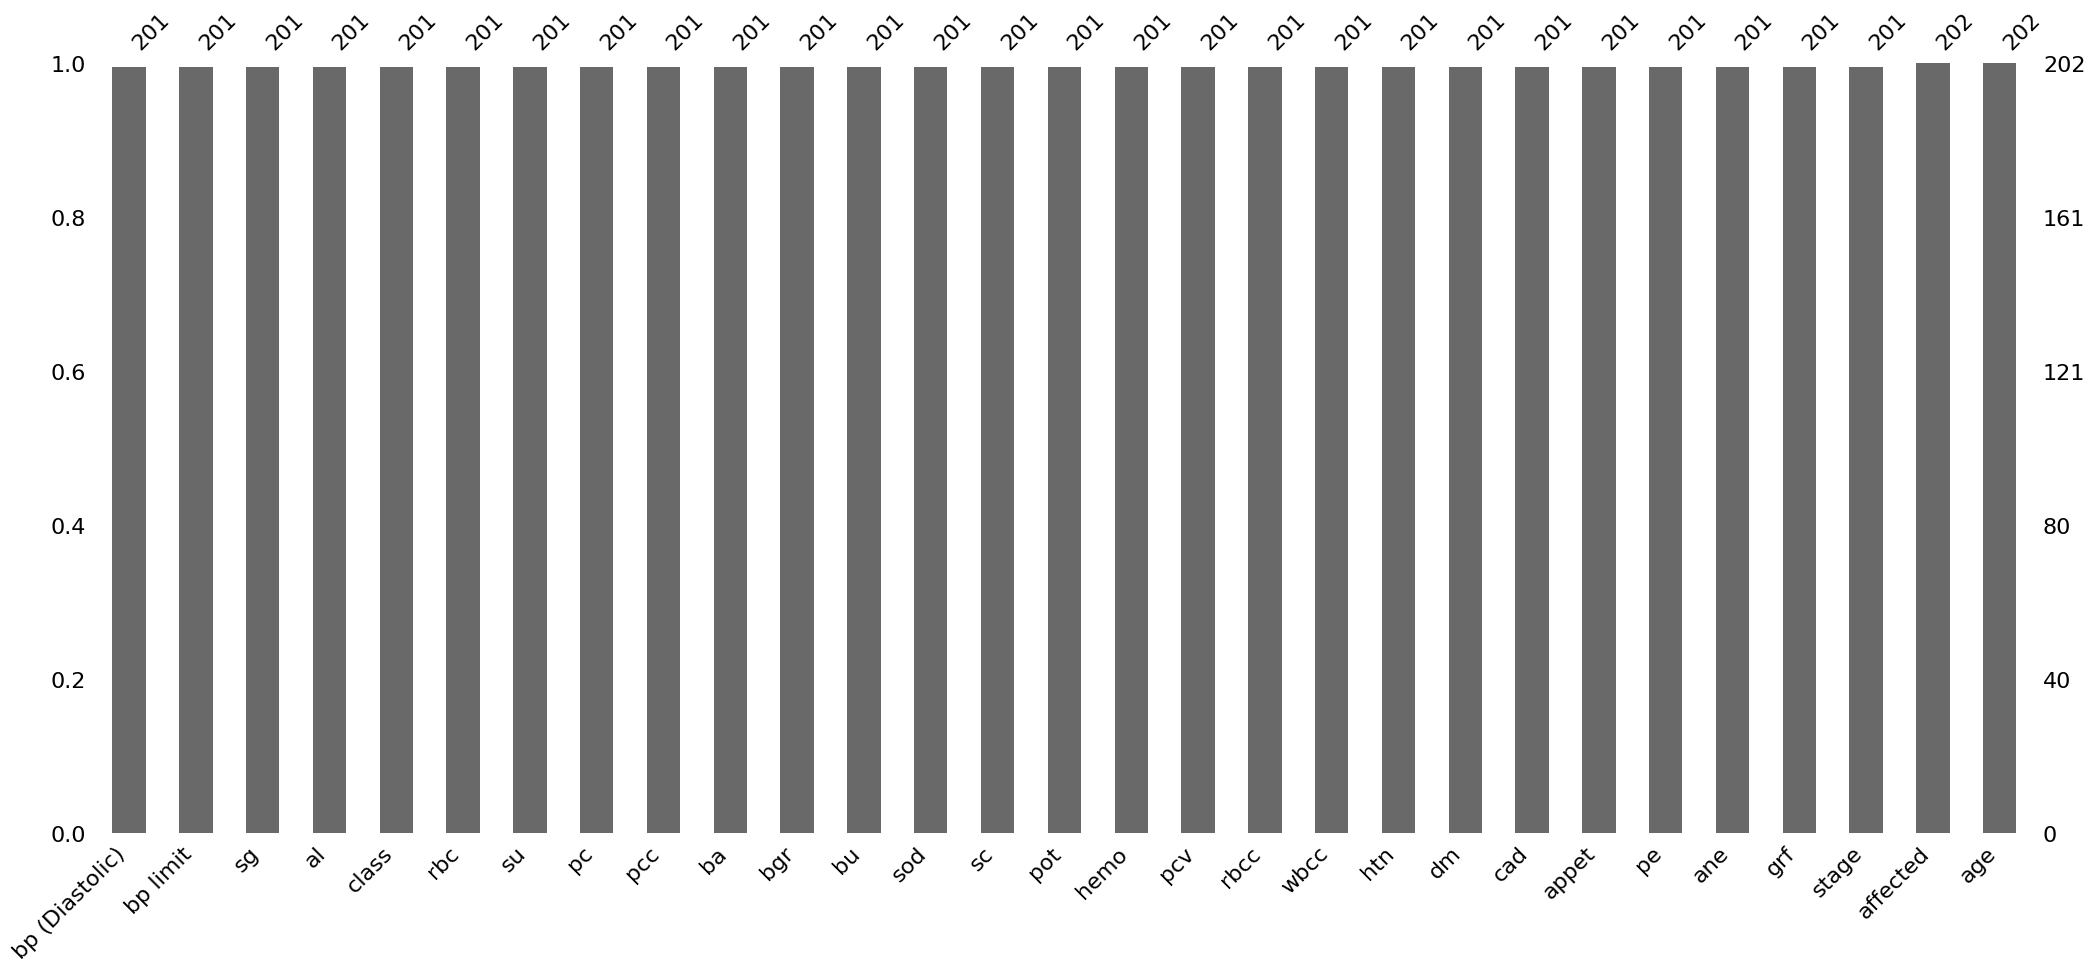

In [102]:
## Check missingness bar chart
msno.bar(RCKD);

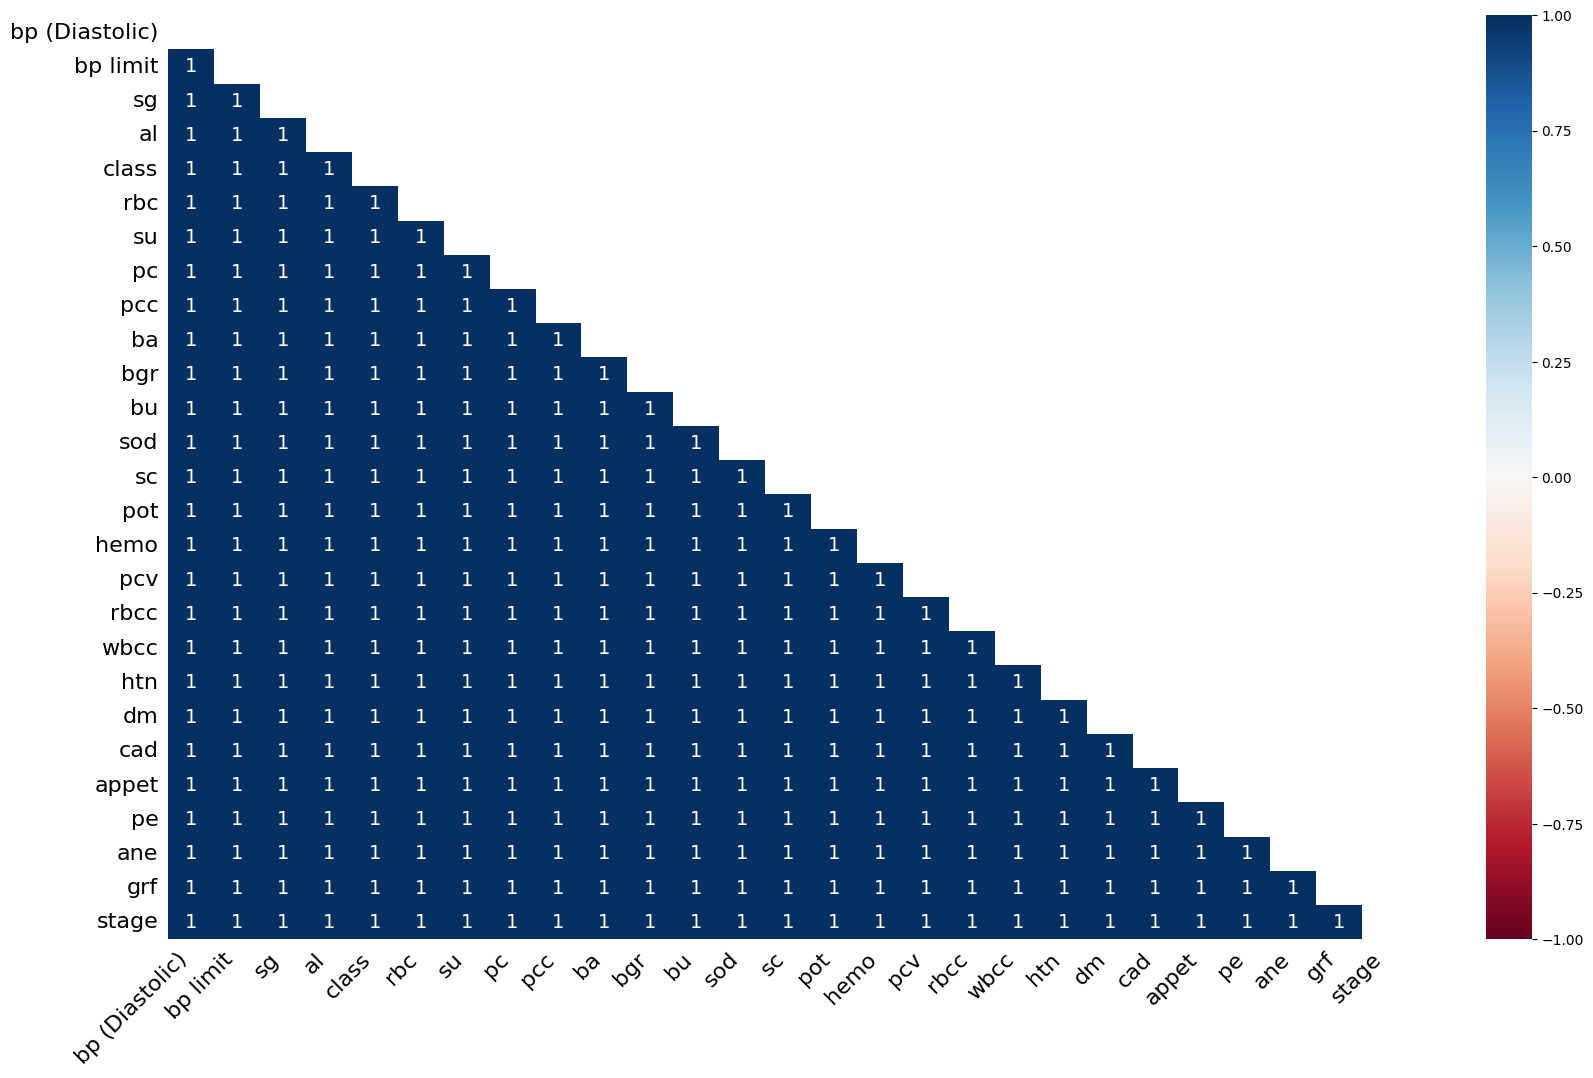

In [103]:
msno.heatmap(RCKD);

<Figure size 1000x600 with 0 Axes>

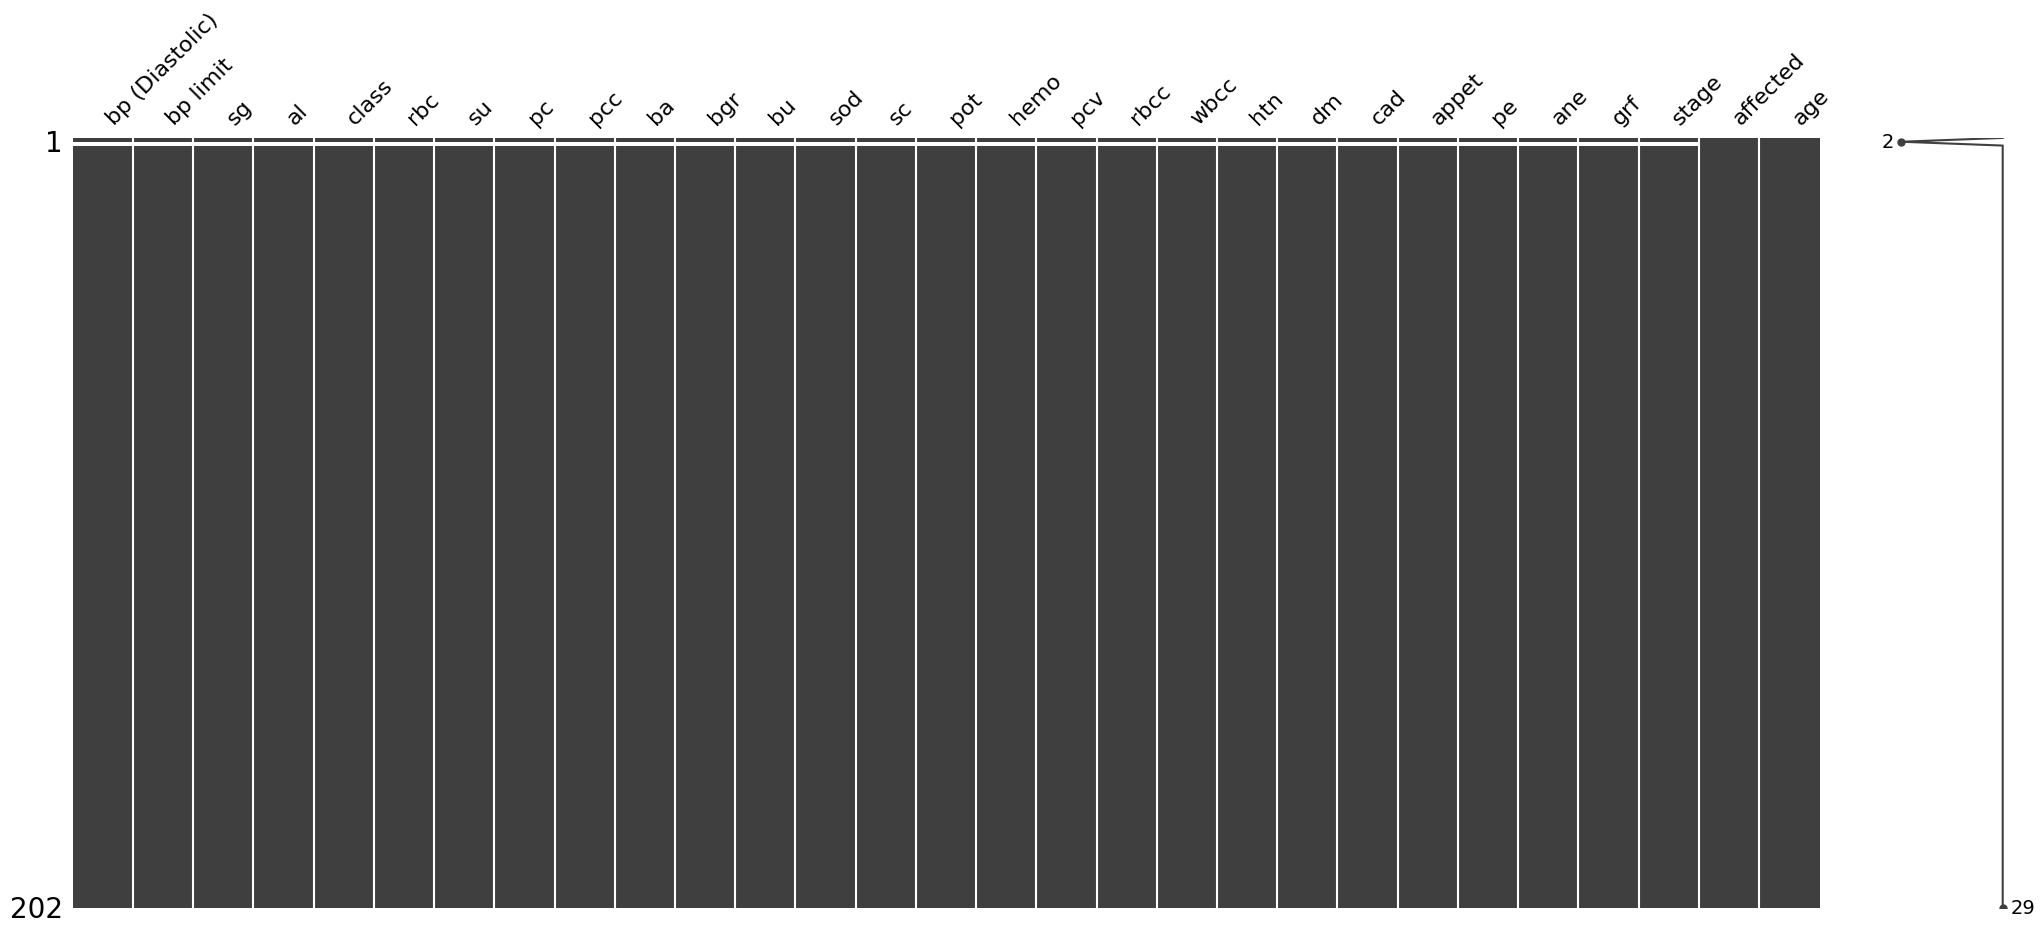

In [104]:
# Visualize missing values
plt.figure(figsize=(10, 6))
msno.matrix(RCKD)
plt.show()

I dropped all the values in rows containing missing values because the row containing missing values is row 1. The Value for affected is class and age meta.

In [105]:
RCKD = RCKD.dropna(axis = 0, how ='any')
print(RCKD.isnull().sum())
RCKD.shape

bp (Diastolic)    0
bp limit          0
sg                0
al                0
class             0
rbc               0
su                0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sod               0
sc                0
pot               0
hemo              0
pcv               0
rbcc              0
wbcc              0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
grf               0
stage             0
affected          0
age               0
dtype: int64


(201, 29)

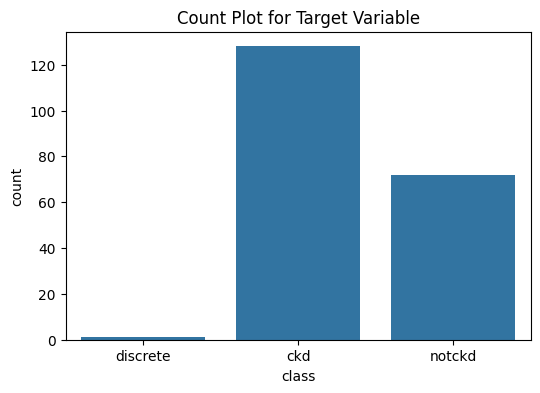

In [106]:
# Count plot for target variable (if available, e.g., 'class' for classification problems)
if 'class' in RCKD.columns:  # Adjust 'class' to match your target column
    plt.figure(figsize=(6, 4))
    sns.countplot(x='class', data=RCKD)
    plt.title("Count Plot for Target Variable")
    plt.show()

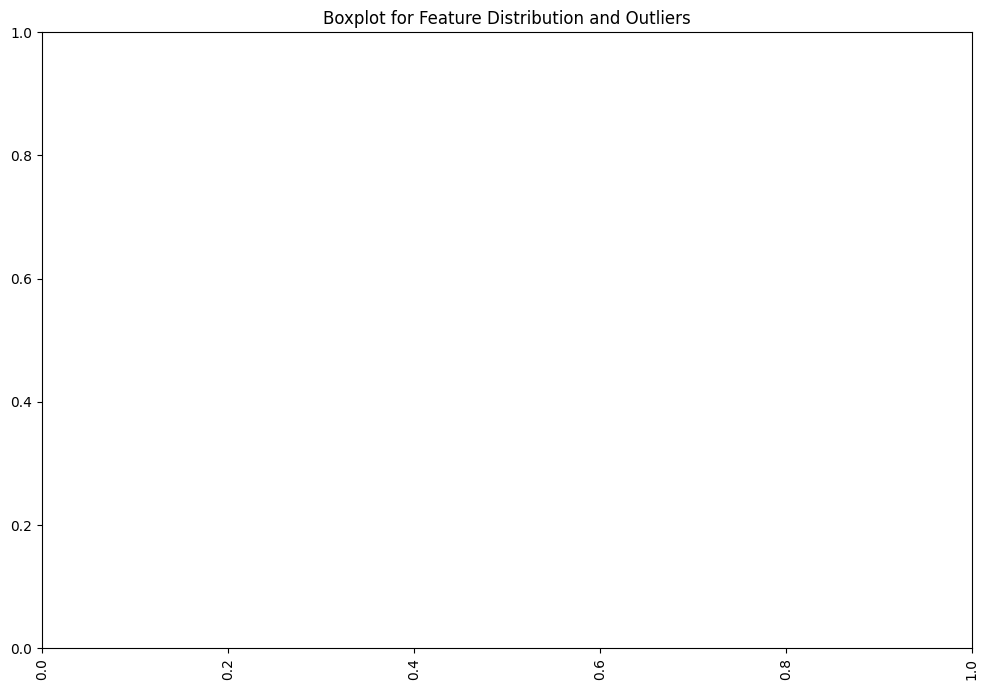

In [107]:
#Boxplot for detecting outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=RCKD, palette="Set2")
plt.title("Boxplot for Feature Distribution and Outliers")
plt.xticks(rotation=90)
plt.show()

In [108]:
pip install ipywidgets

**I stop the profie report , however the report was useful)

In [109]:
# Generate the profile report
#profile = ProfileReport(RCKD, title="My Profiling Report")

# Display the report in a Jupyter Notebook
#profile.to_notebook_iframe()


In [110]:
RCKD.count()

,0
bp (Diastolic),201
bp limit,201
sg,201
al,201
class,201
rbc,201
su,201
pc,201
pcc,201
ba,201


In [111]:
RCKD.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201 entries, 0 to 201
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   bp (Diastolic)  201 non-null    object
 1   bp limit        201 non-null    object
 2   sg              201 non-null    object
 3   al              201 non-null    object
 4   class           201 non-null    object
 5   rbc             201 non-null    object
 6   su              201 non-null    object
 7   pc              201 non-null    object
 8   pcc             201 non-null    object
 9   ba              201 non-null    object
 10  bgr             201 non-null    object
 11  bu              201 non-null    object
 12  sod             201 non-null    object
 13  sc              201 non-null    object
 14  pot             201 non-null    object
 15  hemo            201 non-null    object
 16  pcv             201 non-null    object
 17  rbcc            201 non-null    object
 18  wbcc           

Chronic Kidney Disease dataset
Conversion attempt  from RAR to CSV

In [112]:
!pip install rarfile
#!sudo apt-get install unrar


In [113]:
import pandas as pd

In [114]:
pip install rarfile

In [115]:
import rarfile, csv
rar_path = rarfile.RarFile("Chronic_Kidney_Disease.rar")
csv_file_name = "Chronic_Kidney_Disease.csv"
#rar_file = rarfile.RarFile.open(rar_path, csv_file_name)
#csv_reader = csv.reader(rar_file, delimiter=',')

In [116]:
rar_path

In [117]:
csv_file_name

'Chronic_Kidney_Disease.csv'

In [118]:
#First code I used to open the Chronic Kidney Disease rar file. I recived an code error
#rar_file = rarfile.RarFile.open(rar_path, csv_file_name)

In [119]:
#Second attempt code used to open the RAR file that i recived an error.
#import rarfile
#import os

# Path to your .rar file
#rar_path = 'Chronic_Kidney_Disease.rar'
#extract_dir = 'path/to/extracted/files/'

# Open and extract the .rar file
#with rarfile.RarFile(rar_path) as rf:
#rf.extractall(extract_dir)

# List files in the directory
#os.listdir(extract_dir)


Upon investigation, It was discovering the RAR File would not open due to there where 3 files located in the orginal file. Therefore the file that was choosen was to perform project wa the targe and features file

In [120]:
pip install ucimlrepo

In [121]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
chronic_kidney_disease = fetch_ucirepo(id=336)

# data (as pandas dataframes)
feature = chronic_kidney_disease.data.features
target = chronic_kidney_disease.data.targets

# metadata
#print(chronic_kidney_disease.metadata)

# variable information
#print(chronic_kidney_disease.variables)


In [122]:
feature

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,11.3,38.0,6000.0,NaN,no,no,no,good,no,no
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,11.6,35.0,7300.0,4.6,no,no,no,good,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,15.7,47.0,6700.0,4.9,no,no,no,good,no,no
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,16.5,54.0,7800.0,6.2,no,no,no,good,no,no
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,15.8,49.0,6600.0,5.4,no,no,no,good,no,no
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,14.2,51.0,7200.0,5.9,no,no,no,good,no,no


In [123]:
target

,class
0,ckd
1,ckd
2,ckd
3,ckd
4,ckd
...,...
395,notckd
396,notckd
397,notckd
398,notckd


/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


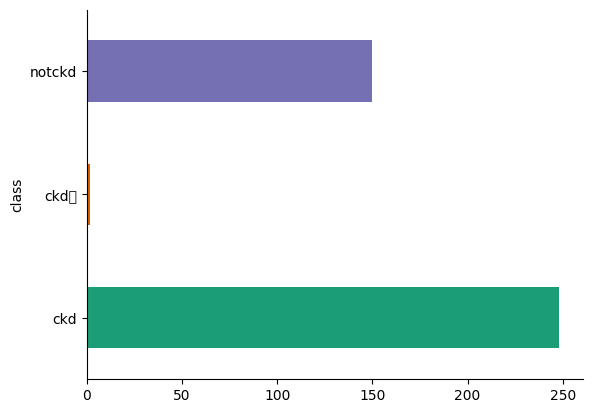

In [124]:
# @title class

from matplotlib import pyplot as plt
import seaborn as sns
target.groupby('class').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [125]:
#Combine the target and feature
df = pd.concat([feature, target], axis =1)

In [126]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [127]:
df['class'].value_counts()

,count
class,
ckd,248
notckd,150
ckd\t,2


In [128]:
df['bu'].value_counts()

,count
bu,
46.0,15
25.0,13
19.0,11
40.0,10
50.0,9
...,...
176.0,1
145.0,1
92.0,1


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     248 non-null    object 
 6   pc      335 non-null    object 
 7   pcc     396 non-null    object 
 8   ba      396 non-null    object 
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    348 non-null    float64
 15  pcv     329 non-null    float64
 16  wbcc    294 non-null    float64
 17  rbcc    269 non-null    float64
 18  htn     398 non-null    object 
 19  dm      398 non-null    object 
 20  cad     398 non-null    object 
 21  appet   399 non-null    object 
 22  pe

In [130]:
df.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


In [131]:
df.isnull().sum()

,0
age,9
bp,12
sg,47
al,46
su,49
rbc,152
pc,65
pcc,4
ba,4
bgr,44


In [132]:
df.dropna(
    axis=0,
    how='any',
    subset=None,
    inplace=True
)

In [133]:
df.isnull().sum()

,0
age,0
bp,0
sg,0
al,0
su,0
rbc,0
pc,0
pcc,0
ba,0
bgr,0


MERGING Risk PREDICITION DATAFRAME(RCKD)with DF( Chromic Kidney Disease ** I will merge by the based on specfic variables that are the same .

In [134]:
!pip install seaborn
import seaborn as sns

In [135]:
# Get the common columns between the two DataFrames
common_cols = list(set(RCKD.columns) & set(df.columns))
print(common_cols)


['sc', 'pe', 'rbcc', 'sg', 'cad', 'al', 'age', 'bgr', 'dm', 'sod', 'pcv', 'ba', 'ane', 'hemo', 'appet', 'pcc', 'pot', 'htn', 'bu', 'class', 'wbcc', 'pc', 'rbc', 'su']


In [136]:
#convert_dtypes() objects to numeric
RCKD_numeric = df.convert_dtypes(infer_objects=True, convert_string=True)

In [137]:
#convert_dtypes() objects to numeric
df_numeric = df.convert_dtypes(infer_objects=True, convert_string=True)

In [138]:
# Get the common columns between the two DataFrames
common_cols = list(set(RCKD_numeric.columns) & set(df_numeric.columns))


In [139]:
# Print the common columns to verify they are the intended ones
print(f"Common columns: {common_cols}")

Common columns: ['bp', 'pe', 'sc', 'rbcc', 'sg', 'cad', 'al', 'age', 'bgr', 'dm', 'sod', 'pcv', 'ba', 'ane', 'hemo', 'appet', 'pcc', 'pot', 'htn', 'bu', 'class', 'wbcc', 'pc', 'rbc', 'su']


In [140]:

# Merge the DataFrames using only the common columns
merged_df = pd.merge(RCKD_numeric, df_numeric, on=common_cols, how='outer')

In [141]:
merged_df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,59,50,1.01,3,0,normal,abnormal,notpresent,notpresent,241,...,31,15700,3.8,no,yes,no,good,yes,no,ckd
1,32,60,1.025,0,0,normal,normal,notpresent,notpresent,102,...,41,6800,5.1,no,no,no,good,no,no,notckd
2,47,60,1.02,0,0,normal,normal,notpresent,notpresent,137,...,44,7900,4.5,no,no,no,good,no,no,notckd
3,73,60,1.02,0,0,normal,normal,notpresent,notpresent,127,...,52,11000,4.7,no,no,no,good,no,no,notckd
4,28,60,1.025,0,0,normal,normal,notpresent,notpresent,79,...,51,6500,5.0,no,no,no,good,no,no,notckd


In [142]:
merged_df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'class'],
      dtype='object')

In [143]:
merged_df.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
count,158.0,158.0,158.0,158.0,158.0,158.0,158.0,158.0,158.0,158.0,158.0,158.0,158.0,158.0
mean,49.563291,74.050633,1.019873,0.797468,0.253165,131.341772,52.575949,2.188608,138.848101,4.636709,13.687342,41.917722,8475.949367,4.891772
std,15.512244,11.175381,0.005499,1.41313,0.813397,64.939832,47.395382,3.077615,7.489421,3.476351,2.882204,9.105164,3126.880181,1.019364
min,6.0,50.0,1.005,0.0,0.0,70.0,10.0,0.4,111.0,2.5,3.1,9.0,3800.0,2.1
25%,39.25,60.0,1.02,0.0,0.0,97.0,26.0,0.7,135.0,3.7,12.6,37.5,6525.0,4.5
50%,50.5,80.0,1.02,0.0,0.0,115.5,39.5,1.1,139.0,4.5,14.25,44.0,7800.0,4.95
75%,60.0,80.0,1.025,1.0,0.0,131.75,49.75,1.6,144.0,4.9,15.775,48.0,9775.0,5.6
max,83.0,110.0,1.025,4.0,5.0,490.0,309.0,15.2,150.0,47.0,17.8,54.0,26400.0,8.0


In [144]:
#import pandas as pd

# Calculate mean and standard deviation only for numeric columns
#mean = merged_df.select_dtypes(include=['number']).mean()
#std = merged_df.select_dtypes(include=['number']).std()

# Calculate z-scores for each data point in numeric columns
#numeric_cols = merged_df.select_dtypes(include=['number'])
#z_scores = (numeric_cols - mean) / std

# Identify potential outliers
#outliers = numeric_cols[z_scores > 3]

# Display outliers without dtype information
#print(outliers.to_string())

In [145]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     158 non-null    Int64  
 1   bp      158 non-null    Int64  
 2   sg      158 non-null    Float64
 3   al      158 non-null    Int64  
 4   su      158 non-null    Int64  
 5   rbc     158 non-null    string 
 6   pc      158 non-null    string 
 7   pcc     158 non-null    string 
 8   ba      158 non-null    string 
 9   bgr     158 non-null    Int64  
 10  bu      158 non-null    Int64  
 11  sc      158 non-null    Float64
 12  sod     158 non-null    Int64  
 13  pot     158 non-null    Float64
 14  hemo    158 non-null    Float64
 15  pcv     158 non-null    Int64  
 16  wbcc    158 non-null    Int64  
 17  rbcc    158 non-null    Float64
 18  htn     158 non-null    string 
 19  dm      158 non-null    string 
 20  cad     158 non-null    string 
 21  appet   158 non-null    string 
 22  pe

In [146]:
new_var = merged_df.isnull().sum()
new_var

,0
age,0
bp,0
sg,0
al,0
su,0
rbc,0
pc,0
pcc,0
ba,0
bgr,0


In [147]:
merged_df.shape

(158, 25)

Hot Coding

In [148]:
merged_df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,59,50,1.01,3,0,normal,abnormal,notpresent,notpresent,241,...,31,15700,3.8,no,yes,no,good,yes,no,ckd
1,32,60,1.025,0,0,normal,normal,notpresent,notpresent,102,...,41,6800,5.1,no,no,no,good,no,no,notckd
2,47,60,1.02,0,0,normal,normal,notpresent,notpresent,137,...,44,7900,4.5,no,no,no,good,no,no,notckd
3,73,60,1.02,0,0,normal,normal,notpresent,notpresent,127,...,52,11000,4.7,no,no,no,good,no,no,notckd
4,28,60,1.025,0,0,normal,normal,notpresent,notpresent,79,...,51,6500,5.0,no,no,no,good,no,no,notckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,59,100,1.015,4,2,normal,normal,notpresent,notpresent,255,...,20,9800,3.9,yes,yes,yes,good,no,yes,ckd
154,59,100,1.02,4,2,normal,normal,notpresent,notpresent,252,...,30,26400,3.9,yes,yes,no,poor,yes,no,ckd
155,64,100,1.015,4,2,abnormal,abnormal,notpresent,present,163,...,26,7500,3.4,yes,yes,no,good,yes,no,ckd
156,49,100,1.01,3,0,abnormal,abnormal,notpresent,notpresent,129,...,24,9600,3.5,yes,yes,no,poor,yes,yes,ckd


In [149]:
merged_df = pd.concat([merged_df, pd.get_dummies(merged_df['appet'], prefix='appet', drop_first=True)], axis=1)


In [150]:
merged_df = pd.concat([merged_df, pd.get_dummies(merged_df['ba'], prefix='ba', drop_first=True)], axis=1)

In [151]:
merged_df = pd.concat([merged_df, pd.get_dummies(merged_df['pcc'], prefix='pcc', drop_first=True)], axis=1)

In [152]:
merged_df = pd.concat([merged_df, pd.get_dummies(merged_df['pc'], prefix='pc', drop_first=True)], axis=1)

In [153]:
merged_df = pd.concat([merged_df, pd.get_dummies(merged_df['rbc'], prefix='rbc', drop_first=True)], axis=1)

In [154]:
merged_df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,cad,appet,pe,ane,class,appet_poor,ba_present,pcc_present,pc_normal,rbc_normal
0,59,50,1.01,3,0,normal,abnormal,notpresent,notpresent,241,...,no,good,yes,no,ckd,False,False,False,False,True
1,32,60,1.025,0,0,normal,normal,notpresent,notpresent,102,...,no,good,no,no,notckd,False,False,False,True,True
2,47,60,1.02,0,0,normal,normal,notpresent,notpresent,137,...,no,good,no,no,notckd,False,False,False,True,True
3,73,60,1.02,0,0,normal,normal,notpresent,notpresent,127,...,no,good,no,no,notckd,False,False,False,True,True
4,28,60,1.025,0,0,normal,normal,notpresent,notpresent,79,...,no,good,no,no,notckd,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,59,100,1.015,4,2,normal,normal,notpresent,notpresent,255,...,yes,good,no,yes,ckd,False,False,False,True,True
154,59,100,1.02,4,2,normal,normal,notpresent,notpresent,252,...,no,poor,yes,no,ckd,True,False,False,True,True
155,64,100,1.015,4,2,abnormal,abnormal,notpresent,present,163,...,no,good,yes,no,ckd,False,True,False,False,False
156,49,100,1.01,3,0,abnormal,abnormal,notpresent,notpresent,129,...,no,poor,yes,yes,ckd,True,False,False,False,False


In [155]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          158 non-null    Int64  
 1   bp           158 non-null    Int64  
 2   sg           158 non-null    Float64
 3   al           158 non-null    Int64  
 4   su           158 non-null    Int64  
 5   rbc          158 non-null    string 
 6   pc           158 non-null    string 
 7   pcc          158 non-null    string 
 8   ba           158 non-null    string 
 9   bgr          158 non-null    Int64  
 10  bu           158 non-null    Int64  
 11  sc           158 non-null    Float64
 12  sod          158 non-null    Int64  
 13  pot          158 non-null    Float64
 14  hemo         158 non-null    Float64
 15  pcv          158 non-null    Int64  
 16  wbcc         158 non-null    Int64  
 17  rbcc         158 non-null    Float64
 18  htn          158 non-null    string 
 19  dm      

In [156]:
merged_df = merged_df.drop(columns=['appet_poor', 'ba_present', 'pcc_present', 'pc_normal', 'rbc_normal'])
merged_df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,59,50,1.01,3,0,normal,abnormal,notpresent,notpresent,241,...,31,15700,3.8,no,yes,no,good,yes,no,ckd
1,32,60,1.025,0,0,normal,normal,notpresent,notpresent,102,...,41,6800,5.1,no,no,no,good,no,no,notckd
2,47,60,1.02,0,0,normal,normal,notpresent,notpresent,137,...,44,7900,4.5,no,no,no,good,no,no,notckd
3,73,60,1.02,0,0,normal,normal,notpresent,notpresent,127,...,52,11000,4.7,no,no,no,good,no,no,notckd
4,28,60,1.025,0,0,normal,normal,notpresent,notpresent,79,...,51,6500,5.0,no,no,no,good,no,no,notckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,59,100,1.015,4,2,normal,normal,notpresent,notpresent,255,...,20,9800,3.9,yes,yes,yes,good,no,yes,ckd
154,59,100,1.02,4,2,normal,normal,notpresent,notpresent,252,...,30,26400,3.9,yes,yes,no,poor,yes,no,ckd
155,64,100,1.015,4,2,abnormal,abnormal,notpresent,present,163,...,26,7500,3.4,yes,yes,no,good,yes,no,ckd
156,49,100,1.01,3,0,abnormal,abnormal,notpresent,notpresent,129,...,24,9600,3.5,yes,yes,no,poor,yes,yes,ckd


Univariate EDA







In [157]:
# DataFrame
df = pd.DataFrame({"class": ["Yes", "No", "Yes", "No", "Yes"]})

# Check unique values
unique_classes = merged_df['class'].unique()
print(f"Unique classes: {unique_classes}")
print(f"Number of unique classes: {len(unique_classes)}")


Unique classes: <StringArray>
['ckd', 'notckd']
Length: 2, dtype: string
Number of unique classes: 2


In [158]:
numerical_features = merged_df.select_dtypes(include=np.number).columns
correlation_matrix = merged_df[numerical_features].corr() # Fixed the variable name here

# Display the correlation matrix
print(correlation_matrix)

           age        bp        sg        al        su       bgr        bu  \
age   1.000000  0.079712 -0.277303  0.253380  0.207711  0.301915  0.190636   
bp    0.079712  1.000000 -0.198897  0.322507  0.243828  0.190113  0.316287   
sg   -0.277303 -0.198897  1.000000 -0.712331 -0.448477 -0.544781 -0.545319   
al    0.253380  0.322507 -0.712331  1.000000  0.521448  0.518123  0.661940   
su    0.207711  0.243828 -0.448477  0.521448  1.000000  0.730050  0.312259   
bgr   0.301915  0.190113 -0.544781  0.518123  0.730050  1.000000  0.326496   
bu    0.190636  0.316287 -0.545319  0.661940  0.312259  0.326496  1.000000   
sc    0.189721  0.386551 -0.563122  0.702889  0.347196  0.331284  0.896094   
sod  -0.102933 -0.224710  0.539285 -0.599334 -0.242491 -0.284968 -0.492778   
pot   0.006866  0.127801 -0.075057  0.209492  0.271954  0.102226  0.245427   
hemo -0.245645 -0.282365  0.682086 -0.784745 -0.385511 -0.434158 -0.712196   
pcv  -0.235116 -0.353504  0.678472 -0.775528 -0.404821 -0.443818

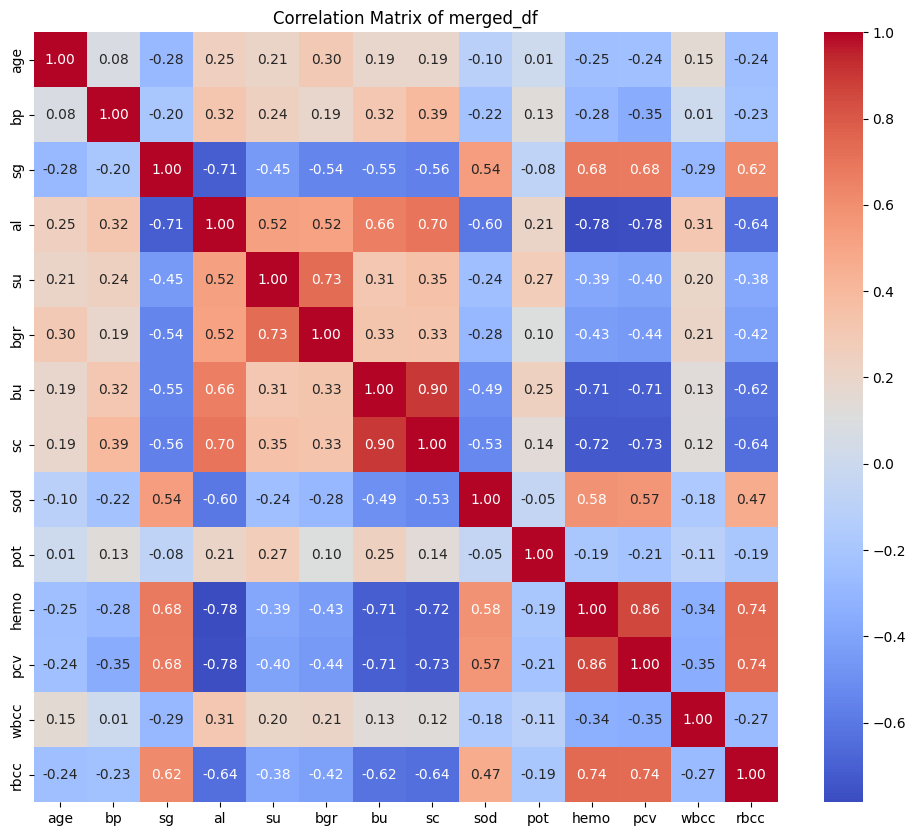

In [159]:
# Calculate the correlation matrix
coorealation_matrix = merged_df[numerical_features].corr()

#correlation_matrix = merged_df.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of merged_df')
plt.show()

Observing Correlation though visualization


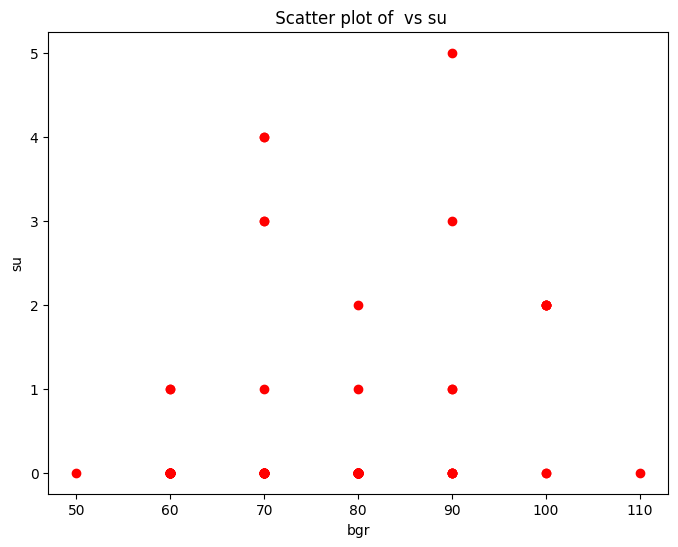

In [160]:
import matplotlib.pyplot as plt
import pandas as pd

# Bp (blood gkucose Random) VS su (Sugar)
plt.figure(figsize=(8, 6))
plt.scatter(merged_df['bp'], merged_df['su'], color='red')
plt.xlabel('bgr')
plt.ylabel('su')
plt.title(' Scatter plot of  vs su')
plt.show()

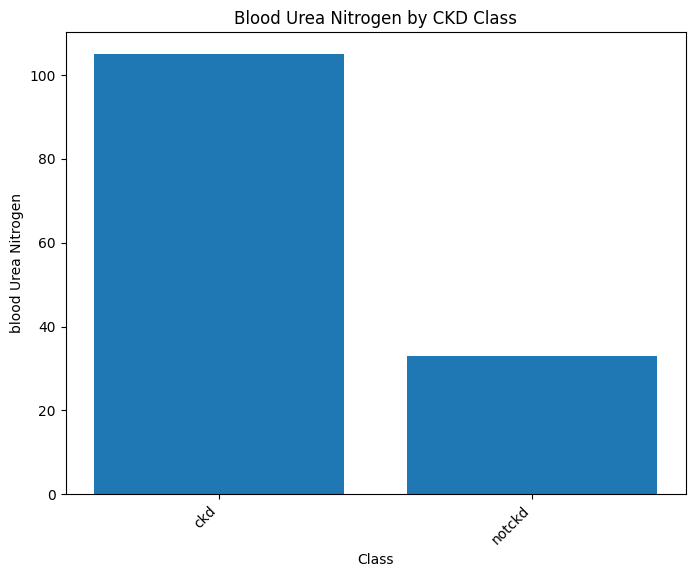

In [161]:


category_means = merged_df.groupby('class')['bu'].mean()

plt.figure(figsize=(8, 6))
plt.bar(category_means.index, category_means.values)
plt.xlabel('Class')
plt.ylabel('blood Urea Nitrogen')
plt.title('Blood Urea Nitrogen by CKD Class')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
plt.show()

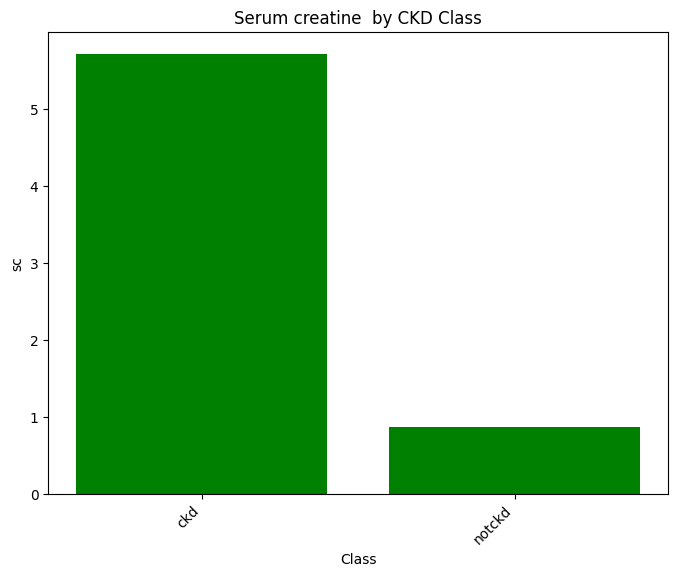

In [162]:
category_means = merged_df.groupby('class')['sc'].mean()

plt.figure(figsize=(8, 6))
plt.bar(category_means.index, category_means.values, color='green')
plt.xlabel('Class')
plt.ylabel('sc')
plt.title('Serum creatine  by CKD Class')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
plt.show()

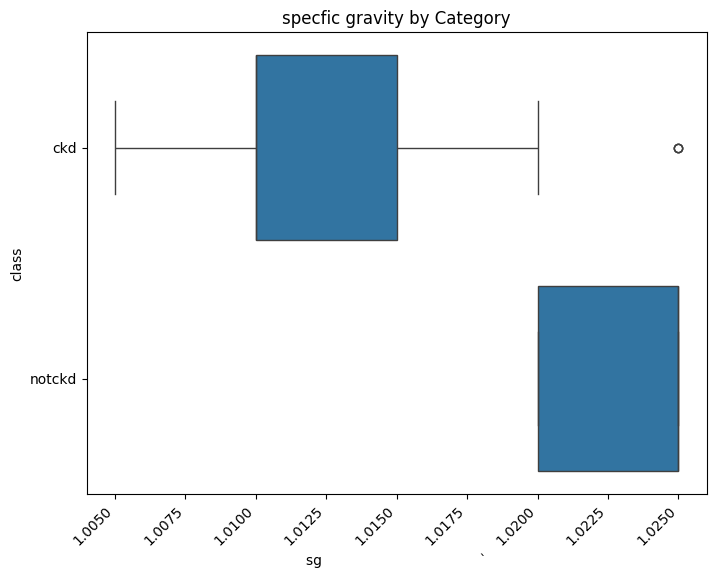

In [163]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


plt.figure(figsize=(8, 6))
sns.boxplot(x='sg', y='class', data=merged_df)
plt.xlabel('sg                                    `')
plt.ylabel('class')
plt.title('specfic gravity by Category')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
plt.show()

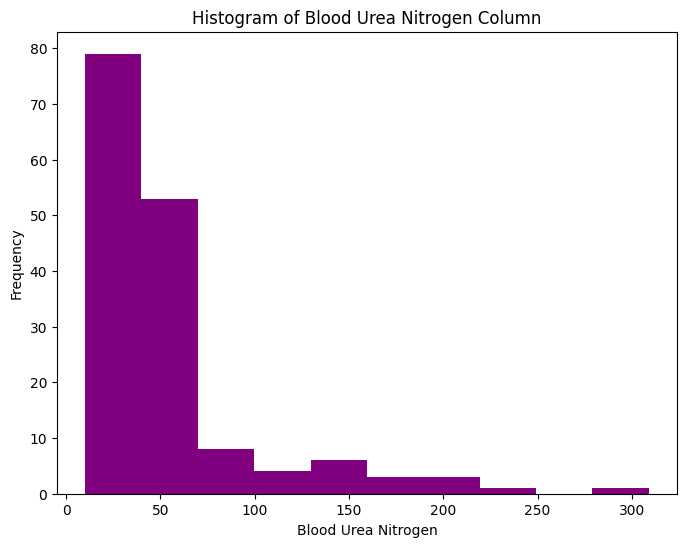

In [164]:
import matplotlib.pyplot as plt



plt.figure(figsize=(8, 6))
plt.hist(merged_df['bu'], bins=10, color='purple')
plt.xlabel('Blood Urea Nitrogen')
plt.ylabel('Frequency')
plt.title('Histogram of Blood Urea Nitrogen Column')
plt.show()

Identify and drop  high Correlation variables ( multivariate relationships ) to simplfy future models  

In [165]:
# Identify correlations above the threshold
threshold = 0.7
corr_matrix = merged_df[numerical_features].corr().abs()

# Find variable pairs with correlation above the threshold
high_corr_pairs = [
    (col1, col2)
    for col1 in corr_matrix.columns
    for col2 in corr_matrix.columns
    if col1 != col2 and corr_matrix.loc[col1, col2] > threshold
]
print(high_corr_pairs)


[('sg', 'al'), ('al', 'sg'), ('al', 'sc'), ('al', 'hemo'), ('al', 'pcv'), ('su', 'bgr'), ('bgr', 'su'), ('bu', 'sc'), ('bu', 'hemo'), ('bu', 'pcv'), ('sc', 'al'), ('sc', 'bu'), ('sc', 'hemo'), ('sc', 'pcv'), ('hemo', 'al'), ('hemo', 'bu'), ('hemo', 'sc'), ('hemo', 'pcv'), ('hemo', 'rbcc'), ('pcv', 'al'), ('pcv', 'bu'), ('pcv', 'sc'), ('pcv', 'hemo'), ('pcv', 'rbcc'), ('rbcc', 'hemo'), ('rbcc', 'pcv')]


In [166]:
# Drop one variable from each correlated pair
variables_to_drop = []
for col1, col2 in high_corr_pairs:
    if col1 not in variables_to_drop and col2 not in variables_to_drop:
        variables_to_drop.append(col2)  # Arbitrarily drop col2

print(f"Variables to drop: {variables_to_drop}")


Variables to drop: ['al', 'bgr', 'sc', 'hemo', 'pcv']


In [167]:
merged_df_simplified = merged_df.drop(columns=variables_to_drop)
print(merged_df_simplified.head())


   age  bp     sg  su     rbc        pc         pcc          ba   bu  sod  \
0   59  50   1.01   0  normal  abnormal  notpresent  notpresent  191  114   
1   32  60  1.025   0  normal    normal  notpresent  notpresent   17  147   
2   47  60   1.02   0  normal    normal  notpresent  notpresent   17  150   
3   73  60   1.02   0  normal    normal  notpresent  notpresent   48  150   
4   28  60  1.025   0  normal    normal  notpresent  notpresent   50  145   

   pot   wbcc  rbcc htn   dm cad appet   pe ane   class  
0  2.9  15700   3.8  no  yes  no  good  yes  no     ckd  
1  4.7   6800   5.1  no   no  no  good   no  no  notckd  
2  3.5   7900   4.5  no   no  no  good   no  no  notckd  
3  3.5  11000   4.7  no   no  no  good   no  no  notckd  
4  5.0   6500   5.0  no   no  no  good   no  no  notckd  


In [168]:
merged_df_simplified.shape

(158, 20)

In [169]:
merged_df_simplified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     158 non-null    Int64  
 1   bp      158 non-null    Int64  
 2   sg      158 non-null    Float64
 3   su      158 non-null    Int64  
 4   rbc     158 non-null    string 
 5   pc      158 non-null    string 
 6   pcc     158 non-null    string 
 7   ba      158 non-null    string 
 8   bu      158 non-null    Int64  
 9   sod     158 non-null    Int64  
 10  pot     158 non-null    Float64
 11  wbcc    158 non-null    Int64  
 12  rbcc    158 non-null    Float64
 13  htn     158 non-null    string 
 14  dm      158 non-null    string 
 15  cad     158 non-null    string 
 16  appet   158 non-null    string 
 17  pe      158 non-null    string 
 18  ane     158 non-null    string 
 19  class   158 non-null    string 
dtypes: Float64(3), Int64(6), string(11)
memory usage: 26.2 KB


In [170]:
merged_df_simplified.shape

(158, 20)

In [171]:
# label encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'class']:
    merged_df_simplified[col] = label_encoder.fit_transform(merged_df_simplified[col])


In [172]:
merged_df_simplified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     158 non-null    Int64  
 1   bp      158 non-null    Int64  
 2   sg      158 non-null    Float64
 3   su      158 non-null    Int64  
 4   rbc     158 non-null    int64  
 5   pc      158 non-null    int64  
 6   pcc     158 non-null    int64  
 7   ba      158 non-null    int64  
 8   bu      158 non-null    Int64  
 9   sod     158 non-null    Int64  
 10  pot     158 non-null    Float64
 11  wbcc    158 non-null    Int64  
 12  rbcc    158 non-null    Float64
 13  htn     158 non-null    int64  
 14  dm      158 non-null    int64  
 15  cad     158 non-null    int64  
 16  appet   158 non-null    int64  
 17  pe      158 non-null    int64  
 18  ane     158 non-null    int64  
 19  class   158 non-null    int64  
dtypes: Float64(3), Int64(6), int64(11)
memory usage: 26.2 KB


In [173]:
# Calculate standard deviation for each column
std_deviation = merged_df_simplified.std()

# Display the results
print(std_deviation)

age        15.512244
bp         11.175381
sg          0.005499
su          0.813397
rbc         0.318729
pc          0.388343
pcc          0.28508
ba          0.265759
bu         47.395382
sod         7.489421
pot         3.476351
wbcc     3126.880181
rbcc        1.019364
htn         0.412261
dm          0.383065
cad         0.255315
appet       0.326292
pe          0.333562
ane          0.30264
class       0.446483
dtype: Float64


In [174]:
column_means = merged_df_simplified.mean()
print(column_means)

age        49.563291
bp         74.050633
sg          1.019873
su          0.253165
rbc         0.886076
pc          0.816456
pcc         0.088608
ba          0.075949
bu         52.575949
sod       138.848101
pot         4.636709
wbcc     8475.949367
rbcc        4.891772
htn          0.21519
dm          0.177215
cad          0.06962
appet       0.120253
pe          0.126582
ane         0.101266
class       0.727848
dtype: Float64


In [175]:
import pandas as pd

# Calculate correlation between features and target
correlations = merged_df_simplified.corr()['class'].abs().sort_values(ascending=False)
print(correlations)

# Inspect features with high correlation to 'class'
highly_correlated_features = correlations[correlations > 0.8].index  # Adjust threshold as needed
print(highly_correlated_features)



class    1.000000
htn      0.856334
sg       0.790102
pc       0.775388
dm       0.758965
rbcc     0.719978
bu       0.677611
sod      0.640902
pe       0.622573
appet    0.604622
rbc      0.586391
ane      0.548947
su       0.510615
pcc      0.509915
ba       0.468845
cad      0.447355
wbcc     0.407570
bp       0.326567
age      0.305119
pot      0.153565
Name: class, dtype: float64
Index(['class', 'htn'], dtype='object')


In [176]:
# Check for duplicate rows
num_duplicates = merged_df_simplified.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


# **LOGISTIC REGRESSION**

In [177]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# 1. Prepare the data
X = merged_df_simplified.drop(columns=['htn','sg','pc','dm','rbcc','bu','sod','pe','appet','rbc','class'])
y = merged_df_simplified['class']  # Target variable


# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.2, random_state=101)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#. Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

#  Define the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['liblinear', 'saga', 'lbfgs', 'newton-cg'],
    'max_iter': [1000,2000,3000,4000],
}


# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit grid_search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validated score: {grid_search.best_score_:.2f}")


#  Make predictions on the test set
y_train_pred = model.predict(X_train)
# Predict on testing data
y_test_pred = model.predict(X_test)


#  Evaluate the model
#Calculate training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy}")
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Testing Accuracy: {test_accuracy}")


# Print classification report and confusion matrix for training data
print("\nClassification Report (Training Data):")
print(classification_report(y_train, y_train_pred))
print("\nConfusion Matrix (Training Data):")
print(confusion_matrix(y_train, y_train_pred))

# Print classification report and confusion matrix for testing data
print("\nClassification Report (Testing Data):")
print(classification_report(y_test, y_test_pred))
print("\nConfusion Matrix (Testing Data):")
print(confusion_matrix(y_test, y_test_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best parameters found: {'C': 100, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validated score: 0.94
Training Accuracy: 0.9603174603174603
Testing Accuracy: 0.9375

Classification Report (Training Data):
              precision    recall  f1-score   support

           0       1.00      0.85      0.92        34
           1       0.95      1.00      0.97        92

    accuracy                           0.96       126
   macro avg       0.97      0.93      0.95       126
weighted avg       0.96      0.96      0.96       126


Confusion Matrix (Training Data):
[[29  5]
 [ 0 92]]

Classification Report (Testing Data):
              precision    recall  f1-score   support

           0       1.00      0.78      0.88         9
           1       0.92      1.00      0.96        23

    accuracy                           0.94        32
   macro avg       0.96      0.89      0.92        32
weighted avg       0.94      0.94      0.93        32


Confusion Matrix (Testin

In [178]:
# Replace y_pred with y_test_pred
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()

# Calculate specificity
specificity = tn / (tn + fp)

print(f"Specificity: {specificity}")

Specificity: 0.7777777777777778


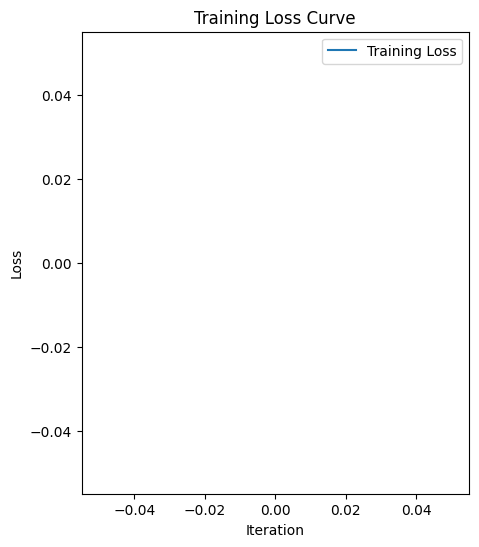

In [179]:
from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt
import numpy as np # Import numpy


#  Create and train the model with loss tracking
model = SGDClassifier(loss='log_loss',  # Use log loss (for logistic regression)
                      max_iter=1000,
                      random_state=42)
# Get training loss per iteration
loss = []
for _ in range(model.max_iter):
    model.partial_fit(X_train, y_train, classes=np.unique(y_train))


# Plot training loss
plt.figure(figsize=(5, 6))
plt.plot(loss, label='Training Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.show()

In [180]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [181]:
cm = confusion_matrix(y_test, y_test_pred)

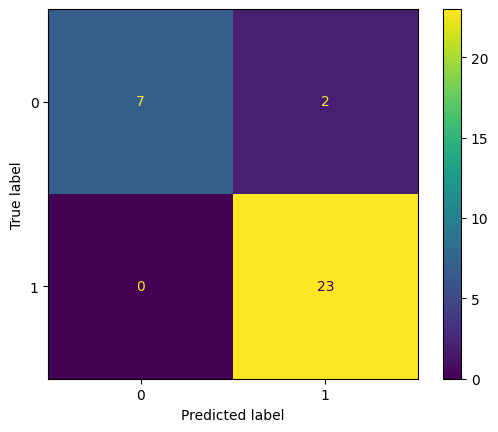

In [182]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

In [183]:
merged_df_simplified.to_csv('data_merged.csv', index=False)

In [184]:
y_test_pred = model.predict(X_test)

In [185]:
cm = confusion_matrix(y_test, y_test_pred)

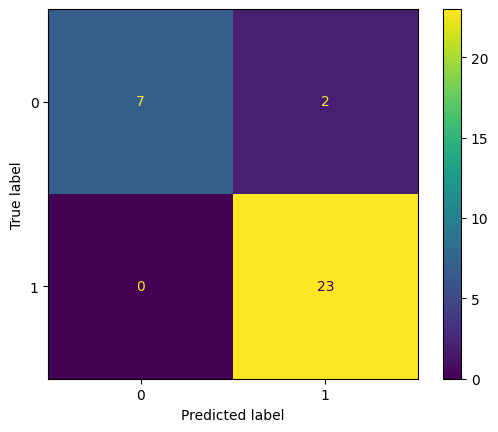

In [186]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

ADA Boost

In [187]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [188]:

# 1. Prepare the data
X = merged_df_simplified.drop(columns=['htn','sg','pc','dm','rbcc','bu','sod','pe','appet','rbc','class'])
y = merged_df_simplified['class']  # Target variable


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=3/5, random_state=22)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

ada_boost = AdaBoostClassifier(n_estimators=50, random_state=42)  # Adjust n_estimators and random_state as needed
ada_boost.fit(X_train, y_train)

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0],
    'algorithm': ['SAMME', 'SAMME.R']
}

grid_search = GridSearchCV(estimator=ada_boost, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print(f"Best Hyperparameters: {best_params}")
print(f"Best Cross-Validation Score: {grid_search.best_score_:.2f}")

y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with Best Model: {accuracy}")

print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validated score: {grid_search.best_score_:.2f}")

# Make predictions on the test set
y_pred = ada_boost.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

Best Hyperparameters: {'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 200}
Best Cross-Validation Score: 0.91
Accuracy with Best Model: 0.9052631578947369
Best parameters found: {'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 200}
Best cross-validated score: 0.91
Accuracy: 0.9157894736842105


In [189]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

Accuracy: 0.92

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        26
           1       0.94      0.94      0.94        69

    accuracy                           0.92        95
   macro avg       0.89      0.89      0.89        95
weighted avg       0.92      0.92      0.92        95


Confusion Matrix:
[[22  4]
 [ 4 65]]


In [190]:
from sklearn.metrics import confusion_matrix



# Get the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Extract values from the confusion matrix
TN = conf_matrix[0, 0]  # True Negatives (top-left)
FP = conf_matrix[0, 1]  # False Positives (top-right)

# Calculate specificity
specificity = TN / (TN + FP)

print(f"Specificity: {specificity:.2f}")

Specificity: 0.85


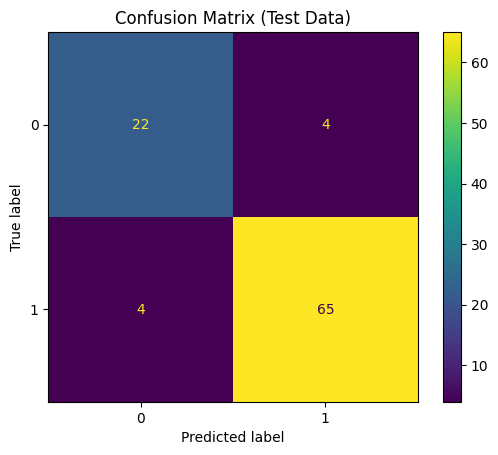

In [198]:
# Generate the confusion matrix for the test data
cm_test = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=ada_boost.classes_)
disp.plot()
plt.title("Confusion Matrix (Test Data)")
plt.show()